Tom Halloin <br> Springboard Data Science Career Track <br>

<h1 align="center">Capstone Project 2: Analysis of Berkshire Hathaway Shareholder Letters Using Natural Language Processing (NLP) Techniques</h1>

<h3 align='center'> Part 4: Summarizing the Letters</h3> <br>

<h3>This notebook will try to provide a summary of the annual letters and visualize the findings in a wordcloud.</h3>

The plan of attack is to look at three different summarization techniques: Lexrank, Textrank, and LSA. I will then use SpaCy to compute similarities between each pair of summaries (Lexrank -> Textrank, Lexrank -> LSA, Textrank -> LSA). I am looking for divergences in this score to find years where the techniques differ to compare and contrast them. 

Credit the following Medium article for this idea:
https://medium.com/@ondenyi.eric/extractive-text-summarization-techniques-with-sumy-3d3b127a0a32
 
Here is a good article explaining each of the summarization methods:
https://towardsdatascience.com/text-summarization-on-the-books-of-harry-potter-5e9f5bf8ca6c

In [1]:
# For garbage collection to speed up loops
import gc 

# Plain text parsers since we are parsing through text
from sumy.parsers.plaintext import PlaintextParser

# For tokenization and summaries
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.summarizers.lsa import LsaSummarizer
from sumy.summarizers.text_rank import TextRankSummarizer

# Progress bars for the impatient
from tqdm.notebook import tqdm

# For plotting
import matplotlib.pyplot as plt

# For similarity scoring
import spacy
nlp = spacy.load("en_core_web_lg")

In [2]:
# Part 1: LexRank

# Storing the summaries as a list
lexrank = []
for year in tqdm(range(1977, 2020)):
    file = f'../clean_letters/{year}_letter.txt' 
    parser = PlaintextParser.from_file(file, Tokenizer('english'))
    summarizer = LexRankSummarizer()
    #Summarize the document with sentences
    summary = summarizer(parser.document, 5)
    sentences=[]
    for sentence in summary:
        gc.disable()
        sentences.append(str(sentence))
        gc.enable()
    lexrank.append(sentences)

In [3]:
# Part 2: TextRank

textrank = [] 
for year in tqdm(range(1977, 2020)):
    file = f'../clean_letters/{year}_letter.txt' 
    parser = PlaintextParser.from_file(file, Tokenizer('english'))
    summarizer = TextRankSummarizer()
    #Summarize the document with sentences
    summary = summarizer(parser.document, 5) 
    sentences=[]
    for sentence in summary:
        gc.disable()
        sentences.append(str(sentence))
        gc.enable()
    textrank.append(sentences)  

In [4]:
# Part 3: LSA

lsa = []
for year in tqdm(range(1977, 2020)):
    file = f'../clean_letters/{year}_letter.txt' 
    parser = PlaintextParser.from_file(file, Tokenizer('english'))
    summarizer = LsaSummarizer()
    #Summarize the document with sentences
    summary = summarizer(parser.document, 5)
    sentences=[]
    for sentence in summary:
        gc.disable()
        sentences.append(str(sentence))
        gc.enable()
    lsa.append(sentences)    

In [5]:
# Create a doc out of the yearly summaries

similarity_ab = []
similarity_bc = []
similarity_ac = []
for summary in tqdm(range(43)):
    nlp_lexrank = nlp(str(lexrank[summary][0:4]))
    nlp_textrank = nlp(str(textrank[summary][0:4]))
    nlp_lsa = nlp(str(lsa[summary][0:4]))
    gc.disable()
    similarity_ab.append(nlp_lexrank.similarity(nlp_textrank))
    similarity_ac.append(nlp_lexrank.similarity(nlp_lsa))
    similarity_bc.append(nlp_textrank.similarity(nlp_lsa))
    gc.enable()
# Get a similarity between all three of the different summary techniques. (A -> B) (B -> C) (A -> C)
# Plot these three lines on a line chart using year as the X-axis and similarity as the Y-axis

This graph plots similarity scores between each of the pairs of methods by year. Because the summaries are pulling from the same data set, I expect the summaries to be similar, as well. All this chart is doing is trying to find where there are huge differences between the summaries so we can compare and contrast them a little better.

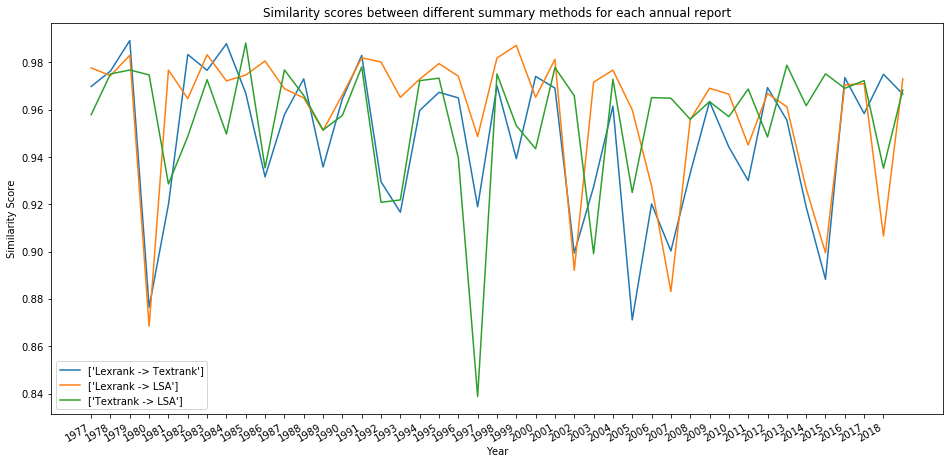

In [6]:


# If the graph does not appear, try running the cell again.

f, ax = plt.subplots(figsize=(16, 8))
plt.plot(similarity_ab)
plt.plot(similarity_ac)
plt.plot(similarity_bc)
plt.legend([['Lexrank -> Textrank'], ['Lexrank -> LSA'], ['Textrank -> LSA']])

ax.set_title('Similarity scores between different summary methods for each annual report')
ax.set_xticks([x for x in range(42)])
ax.set_xticklabels([str(x) for x in range(1977, 2020)])
ax.set_ylabel('Similarity Score')
ax.set_xlabel('Year')

f.autofmt_xdate()

plt.show()

Using 1997 as an example, I will print the most relevant summaries from each summarization method.

In [7]:
lexrank[20]

['Even though they are going to be net buyers of stocks formany years to come, they are elated when stock prices rise and depressedwhen they fall.',
 'Now assume that the dice will be thrown once a year; that you, the&quot;bond-buyer,&quot; agree to pay $50 million if a 12 appears; and thatfor &quot;insuring&quot; this risk you take in an annual &quot;premium&quot;of $1 million.',
 '&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; At GEICO, we are paying in a waythat makes sense for both our owners and our managers.',
 '12/31/97        Shares  Company                      Cost      Market                                                (dollars in millions)    49,456,900  American Express Company     $1,392.7   $  4,414.0   200,000,000  The Coca-Cola Company         1,298.9     13,337.5    21,563,414  The Walt Disney Company         381.2      2,134.8    63,977,600  Freddie Mac                     329.4      2,683.1    48,000,000  The Gillette Company            600.0      4,821.0    23,733,198  Tr

In [8]:
textrank[20]

['&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Here are the growth rates of thetwo segments by decade:                                                Pre-tax Earnings Per Share                          Investments          Excluding All Income from  Decade Ending            Per Share                  Investments              1977                   24.6%                       27.6%      1987                   26.5%                       24.1%      1997                   25.5%                       20.8% Annual Growth  Rate, 1967-1997            25.6%                       24.2%&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; During 1997, both parts of ourbusiness grew at a satisfactory rate, with investments increasing by $9,543per share, or 33.5%, and operating earnings growing by $296.43 per share,or 70.3%.',
 '&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Below are the new business andin-force figures for the last five years:                       New Voluntary      Voluntary Auto      Years           Auto Polic

In [9]:
lsa[20]

['Whenever we buy into an industry whose leading participants arentknown to me, I always ask our new partners, &quot;Are there any more athome like you?&quot; Upon our purchase of Nebraska Furniture Mart in 1983,therefore, the Blumkin family told me about three outstanding furnitureretailers in other parts of the country.',
 'As was thecase with the Blumkins and Bill Child, I had no need to check leases, workout employment contracts, etc.',
 'That other possibility   synergygains   is usually unrealistic, since we expect acquirees to operate afterweve bought them just as they did before.',
 'Coke continues to increase itsmarket dominance throughout the world, but, tragically, it has lost theleader responsible for its outstanding performance.',
 'After his death, I read every one of themore than 100 letters and notes he had written me during the past nineyears.']

If I am looking for sentences that best summarize the letters, I am going with the LSA approach. The other two methods try to catch valuable terms, but the sentences themselves do not make sense together. 

Here is a list of summaries for each letter using LSA.

In [12]:
for summary in lsa:
    print(summary)

['However, insurance operations, led again by the truly outstanding results of Phil Liesche’s managerial group at National Indemnity Company, were even better than our optimistic expectations.', 'After all, even a totally dormant savings account will produce steadily rising interest earnings each year because of compounding.', 'In a sense, this is the opposite case from our textile business where even very good management probably can average only modest results.', 'Just as it would be foolish to focus unduly on short-term prospects when acquiring an entire company, we think it equally unsound to become mesmerized by prospective near term earnings or recent trends in earnings when purchasing small pieces of a company; i.e., marketable common stocks.', 'When prices are appropriate, we are willing to take very large positions in selected companies, not with any intention of taking control and not foreseeing sell-out or merger, but with the expectation that excellent business results by c

['Should members of their families desire to, they can pursue varying financial paths without running into the complications that often arise when assets are concentrated in a private business.', 'These factors will probably strike many analysts as unbearably fuzzy, since they cannot be extracted from a data base of any kind.', 'Is it really so difficult to conclude that Coca-Cola and Gillette possess far less business risk over the long term than, say, any computer company or retailer?', 'Should we conclude from this similarity that the competitive strength of Coke and Gillette gains them nothing when business risk is being measured?', 'But its quite possible for ordinary investors to make such distinctions if they have a reasonable understanding of consumer behavior and the factors that create long-term competitive strength or weakness.']
['First, however, the promised accounting lesson:  When we paid a $142.6 million premium over book value for Scott Fetzer, that figure had to be re

['A lot has happened at GEICO during the last 60 years, but its core goal  saving Americans substantial money on their purchase of auto insurance  remains unchanged.', 'In our earlier estimate of Berkshires normal earning power, we made three adjustments that relate to future investment income (but did not include anything for the undistributed earnings factor I have just described).', 'Sometimes these same general partners thereafter quickly started another fund so that they could immediately participate in future profits without having to overcome their past losses.', 'Charlie and I did, however, both work as young boys at my grandfathers grocery store, though our periods of employment were separated by about five years.', 'Moreover, during the episodes of financial chaos that occasionally erupt in our economy, we will be equipped both financially and emotionally to play offense while others scramble for survival.']
['Though we have annually received interest payments of about $102 m